In [21]:
# I/O and Computation
import numpy as np
import pandas as pd

# Viz
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Read
df = pd.read_csv("pollution_USA.csv")
# Time Formatting
df = df.drop(['Unnamed: 0'], axis=1)
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') # date parse
df['Year'] = df['Date Local'].dt.year # year
def custom_describe(df):
  
    unique_count = []
    for x in df.columns:
        mode = df[x].mode().iloc[0]
        unique_count.append([x,
                             len(df[x].unique()),
                             df[x].isnull().sum(),
                             mode,
                             df[x][df[x]==mode].count(),
                             df[x].dtypes])
    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing","Mode","Mode Occurence","dtype"]).set_index("Column").T
describe = custom_describe(df)
display(describe.iloc[:,0:15])
display(describe.iloc[:,15:])

Column,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean
Unique,47,73,110,204,47,133,144,5996,1,31859,990,24,129,1,8196
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mode,6,13,5,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10 00:00:00,Parts per billion,0,20,6,25,Parts per million,0.026
Mode Occurence,576142,149210,76108,35332,576142,93381,138411,640,1746661,8244,31394,168945,77270,1746661,2630
dtype,int64,int64,int64,object,object,object,object,datetime64[ns],object,float64,float64,int64,int64,object,float64


Column,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year
Unique,134,24,125,1,12736,921,24,141,1,34123,2698,24,108,17
Missing,0,0,0,0,0,0,0,872907,0,0,0,0,873323,0
Mode,0.034,10,31,Parts per billion,0,1,8,0,Parts per million,0.2,0.3,0,3,2013
Mode Occurence,48910,479532,98171,1746661,146207,173571,235677,191914,1746661,62953,220519,544131,145929,134576
dtype,float64,int64,int64,object,float64,float64,int64,float64,object,float64,float64,int64,float64,int64


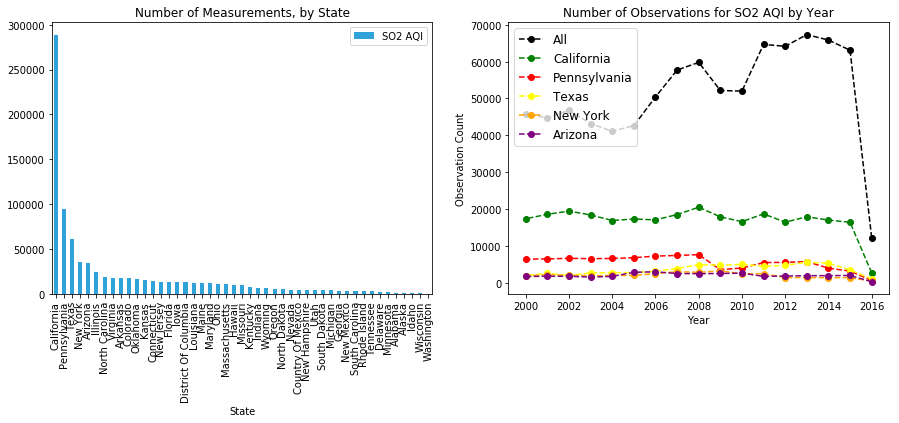

In [22]:
f , ax = plt.subplots(1,2, figsize=[15,5])
df[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("Number of Measurements, by State")

var = "SO2 AQI"

# Df
temp_df = df[[var,'Year','State']].groupby(["Year"]).count().reset_index().sort_values(by='Year',ascending=False)
topstate = df[[var,'State']].groupby(["State"]).count().sort_values(by='SO2 AQI',ascending=False).index [:5]
state_col = ["green","red","yellow","orange","purple"]

# Plot
ax[1].set_title('Number of Observations for {} by Year'.format(var))
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Observation Count')
plt.plot(temp_df.Year,temp_df["SO2 AQI"],marker='o', linestyle='--', color='black', label='Square')
for (i,col) in zip(topstate, state_col):
    state_df= df[df.State==i][[var,'Year','State']].groupby(["Year"])\
    .count().reset_index().sort_values(by='Year',ascending=False)
    ax[1].plot(state_df.Year,state_df[var],marker='o', linestyle='--', color=col, label='Square')
ax[1].legend(topstate.insert(0, "All") , loc=2,fontsize='large')
plt.show()


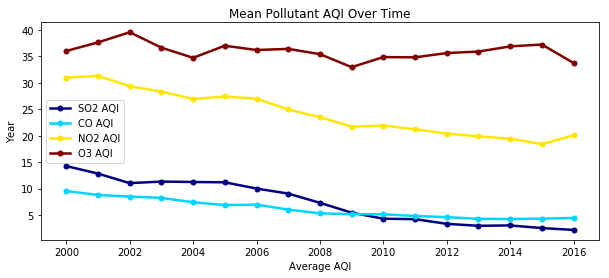

In [23]:
# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
df.groupby(['Year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(lw=2,colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')
ax.set(xlabel="Average AQI", ylabel="Year")
plt.show()

Trend of all pollutants, except for Ozone, is downward, signifying a general betterment of air quality in the United States.

***
# Analysis on New York Data:



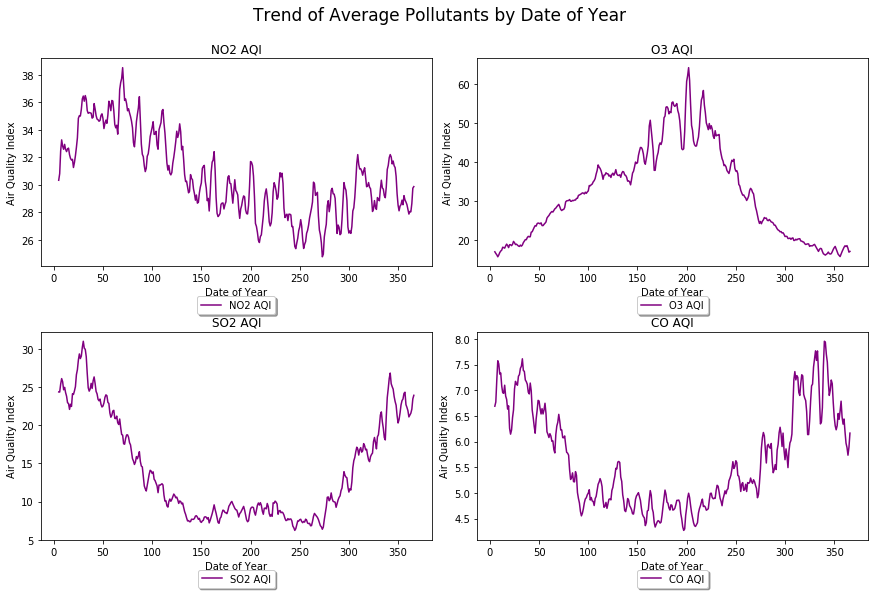

In [24]:
# Plot Mega-Helper
def years_site_city_plot(time, rol_window):
    plt.figure(figsize=(12,8))    
    for var,plot in [('NO2 AQI',221), ('O3 AQI',222),('SO2 AQI',223),("CO AQI",224)]:
        plt.subplot(plot)
        plot1 = cal[[var,time]].groupby([time]).mean()
        plot1[var] = plot1[var].rolling(window = rol_window).mean()
        plt.plot(plot1, color='purple', label=var)
        plt.title(var)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=4)
        plt.title(var)
        plt.xlabel(time)
        plt.ylabel("Air Quality Index")
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=2.5)
    plt.subplots_adjust(top=0.89)
    plt.suptitle("Trend of Average Pollutants by {}".format(time),fontsize=17)
    plt.show()
    

years_site_city_plot(time="Date of Year", rol_window=5)

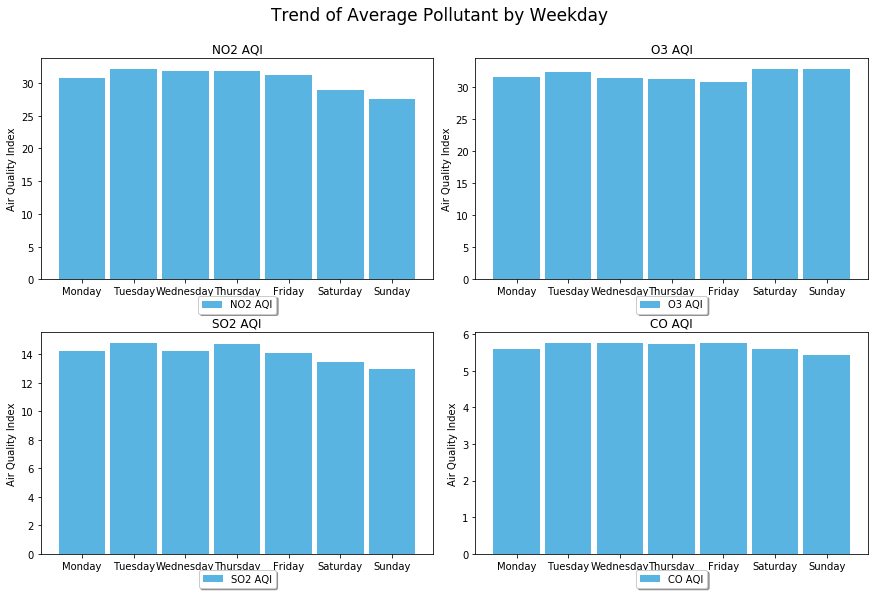

In [25]:
a = 0.80
def pol_bar_plot(time, rol_window):
    plt.figure(figsize=(12,8))
    width = .90 
    plot1 = cal.groupby([time]).mean()
    plot1 = plot1.rolling(window = rol_window).mean()
    X= list(range(len(set(plot1.index))))
    labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    
    for index, (var,plot) in enumerate([('NO2 AQI',221), ('O3 AQI',222),('SO2 AQI',223),("CO AQI",224)]):
        plt.subplot(plot)
        X= list(range(len(set(plot1.index))))
        plt.bar(left=[p + width for p in X], height=plot1[var],
                width=width,label=var,alpha=a)
        plt.title(var)
        # plt.xlabel(time)
        plt.ylabel("Air Quality Index")
        plt.xticks([p + width for p in X], labels)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                   fancybox=True, shadow=True, ncol=4)
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=2.5)
    plt.subplots_adjust(top=0.89)
    plt.suptitle("Trend of Average Pollutant by {}".format(time),fontsize=17)
    plt.show()
    
   
#Plot Data
pol_bar_plot(time="Weekday", rol_window=1)

# 3. Understanding Pollution Distribution and Interactions:
<a id="p5"></a>

_Univariate and Bivariate Analysis_

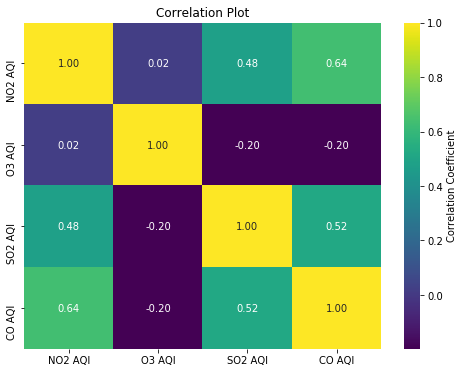

In [16]:
sns.heatmap(Pollutants.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot")
plt.show()

**Interpretation:** <br>
CO AQI and NO2 AQI stand out with the highest positiive correlation out of the bunch.

***
**2-D Distribution:** <br>

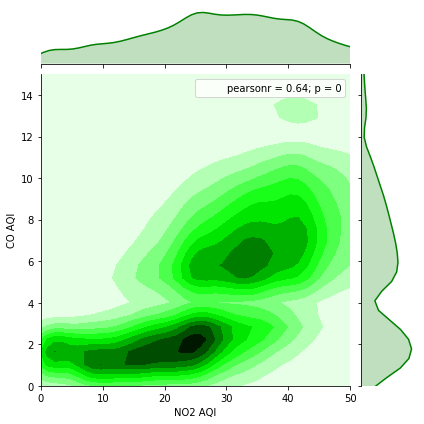

In [17]:
# Examine Strongest Correlation
sns.jointplot(x=cal["NO2 AQI"], y=cal["CO AQI"], kind='kde', xlim=(0,50),ylim=(0,15),color='g')
plt.show()

**Interpretation:** <br>
As Carbon Dioxide increases, so does Nitrogen Oxide. The shade/cloud is a two dimensional distribution.


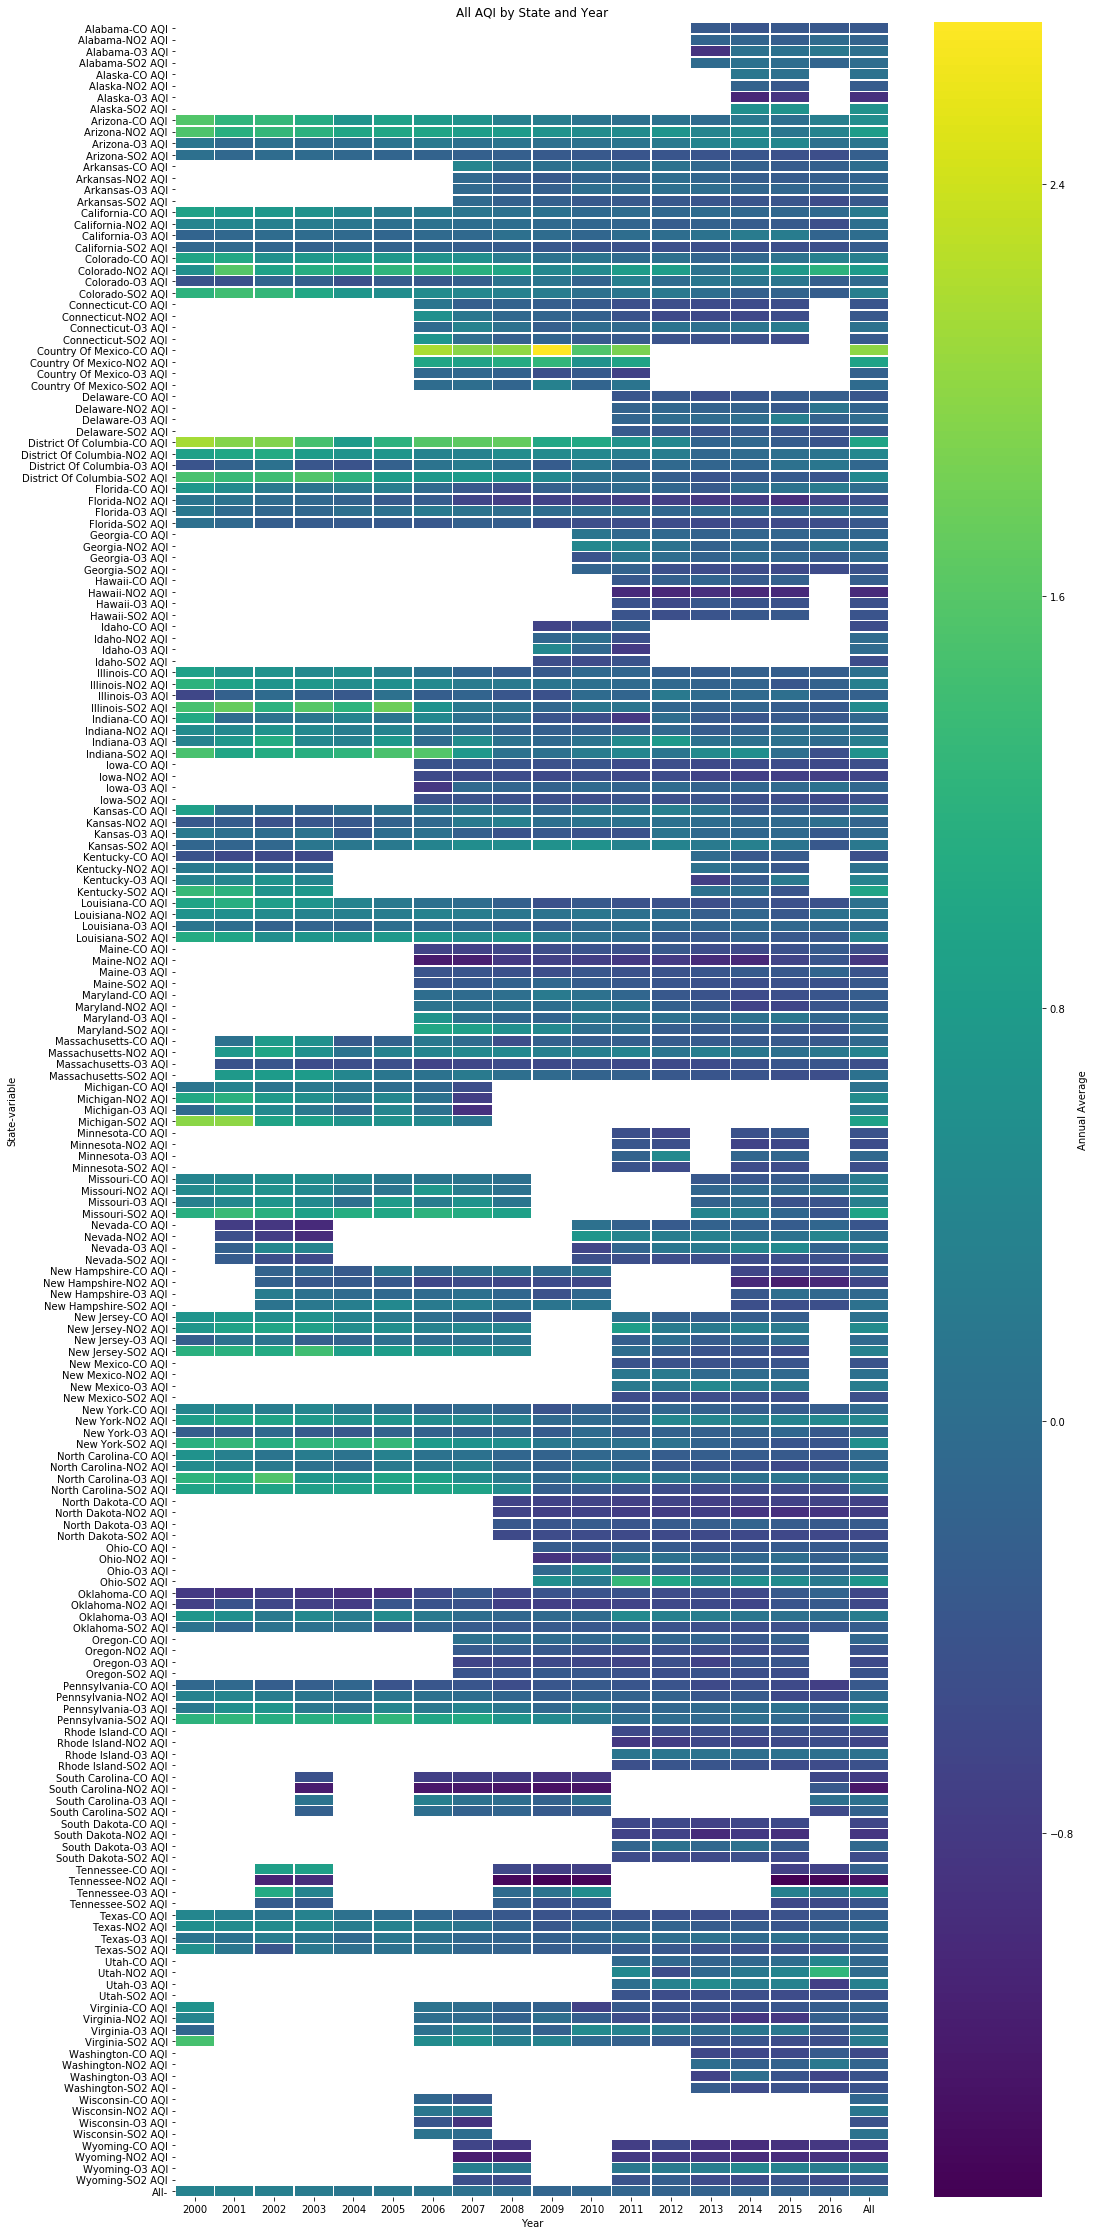

In [18]:
polldata= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]
stack_df = df[['State','Year','NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]]

for col in polldata:
    stack_df[col] =(stack_df[col] - stack_df[col].mean())/stack_df[col].std(ddof=0)
    
stack_df = stack_df.melt(["State", "Year"])#.stack()
stack_df.head()

# Create Heatmap Pivot with State as Row, Year as Col, So2 as Value
polldata= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]

f, ax = plt.subplots(figsize=(16,40))
ax.set_title('All AQI by State and Year')
sns.heatmap(stack_df.pivot_table(values="value", index=["State", "variable"], columns=["Year"], aggfunc='mean',margins=True),
                annot=False, linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'}, cmap="viridis")
plt.show()